# Multi qubit teleportation

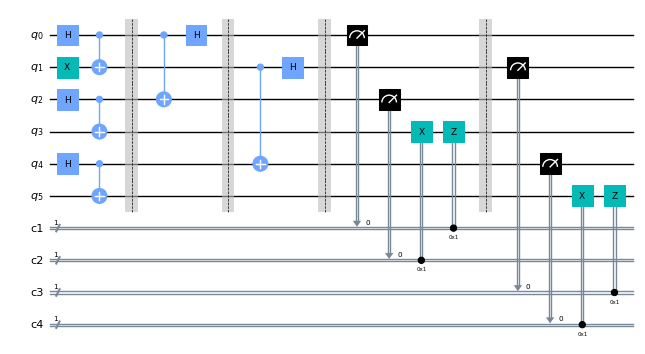

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, assemble
from numpy import pi
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_state_qsphere

qreg_q = QuantumRegister(6, 'q')
creg_c1 = ClassicalRegister(1, 'c1')
creg_c2 = ClassicalRegister(1, 'c2')
creg_c3 = ClassicalRegister(1, 'c3')
creg_c4 = ClassicalRegister(1, 'c4')
circuit = QuantumCircuit(qreg_q, creg_c1, creg_c2, creg_c3, creg_c4)

circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[4], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.measure(qreg_q[0], creg_c1[0])
circuit.measure(qreg_q[2], creg_c2[0])
circuit.x(qreg_q[3]).c_if(creg_c2, 1)
circuit.z(qreg_q[3]).c_if(creg_c1, 1)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.measure(qreg_q[1], creg_c3[0])
circuit.measure(qreg_q[4], creg_c4[0])
circuit.x(qreg_q[5]).c_if(creg_c4, 1)
circuit.z(qreg_q[5]).c_if(creg_c3, 1)

circuit.draw(output="mpl", scale=0.5)

In [2]:

sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
circuit.save_statevector()   # Tell simulator to save statevector
qobj = assemble(circuit)
result = sim.run(qobj).result()

out_state = result.get_statevector()
print(out_state)

Statevector([ 0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j,  0.70710678-8.65956056e-17j,
             -0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
      

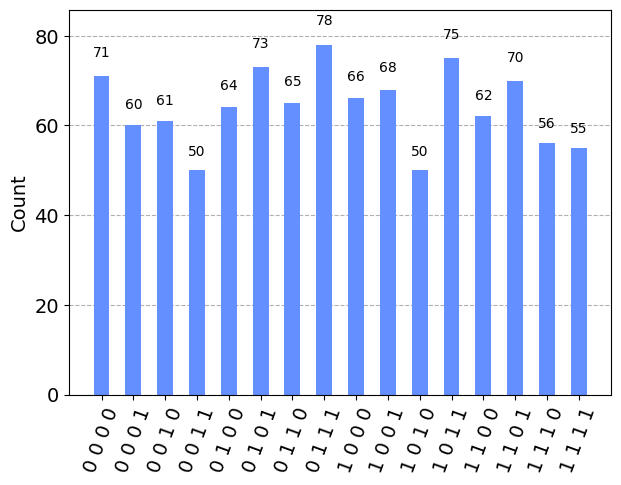

In [3]:
counts = result.get_counts()
plot_histogram(counts)

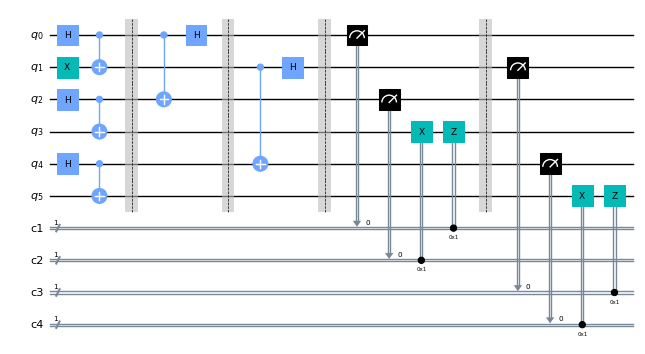

In [4]:
from qiskit import *
from qiskit.visualization import plot_state_city

qreg_q = QuantumRegister(6, 'q')
creg_c1 = ClassicalRegister(1, 'c1')
creg_c2 = ClassicalRegister(1, 'c2')
creg_c3 = ClassicalRegister(1, 'c3')
creg_c4 = ClassicalRegister(1, 'c4')
circuit = QuantumCircuit(qreg_q, creg_c1, creg_c2, creg_c3, creg_c4)

circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[4], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.measure(qreg_q[0], creg_c1[0])
circuit.measure(qreg_q[2], creg_c2[0])
circuit.x(qreg_q[3]).c_if(creg_c2, 1)
circuit.z(qreg_q[3]).c_if(creg_c1, 1)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.measure(qreg_q[1], creg_c3[0])
circuit.measure(qreg_q[4], creg_c4[0])
circuit.x(qreg_q[5]).c_if(creg_c4, 1)
circuit.z(qreg_q[5]).c_if(creg_c3, 1)

circuit.draw(output="mpl", scale=0.5)



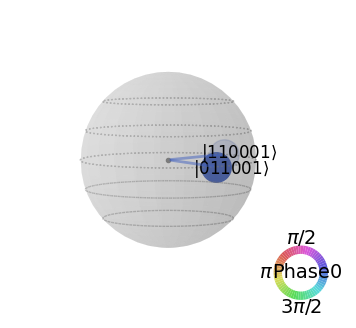

In [5]:

backend = Aer.get_backend('statevector_simulator')  # Tell Qiskit how to simulate our circuit
result = backend.run(transpile(circuit, backend)).result()
psi  = result.get_statevector(circuit)

# plot_state_city(psi)
# print (psi)

plot_state_qsphere(psi, figsize=(5,4))
